# Decision Trees

Decision Tree learning is used to approximate discrete valued target functions, in which the learned function is approximated by Decision Tree. To imagine, think of decision tree as if or else rules where each if-else condition leads to certain answer at the end. You might have seen many online games which asks several question and lead to something that you would have thought at the end. A classic famous example where decision tree is used is known as Play Tennis.

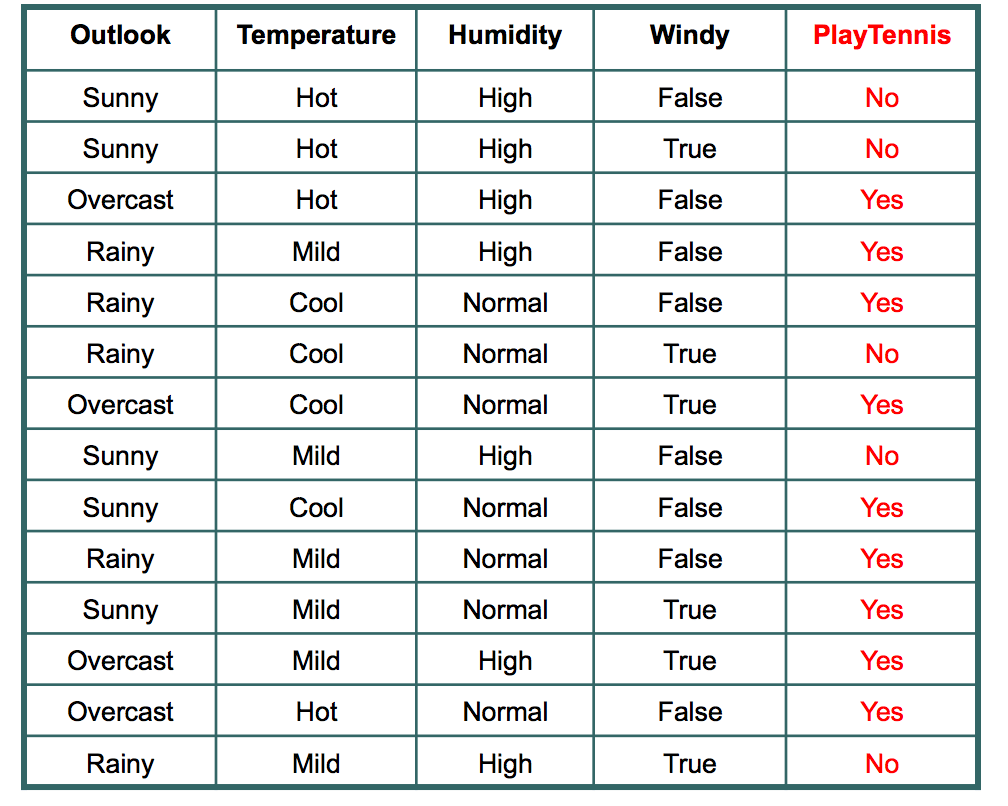

# Decision Tree for the above dataset

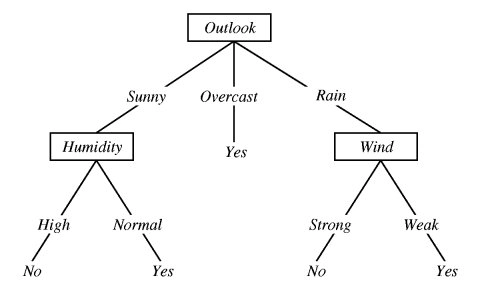

# Entropy

Entropy is a measure of randomness. In other words, its a measure of unpredictability. We will take a moment here to give entropy in case of binary event(like the coin toss, where output can be either of the two events, head or tail) a mathematical face:

Entropy = -(probability(a) * log2(probability(a))) – (probability(b) * log2(probability(b)))

where probability(a) is probability of getting head and probability(b) is probability of getting tail.

Of course this formulae can be generalised for n discreet outcome as follow:

Entropy = -p(1)*log2(p(1)) -p(2)*log2(p(2))-p(3)*log2(p(3))………………………..p(n)*log(2p(n))

# Information Gain(IG)

IG = Entropy(y) - sum((Di/D)*Entropy(Di))



In the decision tree shown above for the play tennis dataset:

We decided to break the first decision on the basis of outlook. We could have our first decision based on humidity or wind but we chose outlook. Why?

Because making our decision on the basis of outlook reduced our randomness in the outcome(which is whether to play or not), more than what it would have been reduced in case of humidity or wind.

# Let’s understand with the example here. Please refer to the play tennis dataset that is shown above.

We have data for 14 days. We have only two outcomes :

Either we played tennis or we didn’t play.

In the given 14 days, we played tennis on 9 occasions and we did not play on 5 occasions.

Probability of playing tennis:

Number of favourable events : 9

Number of total events : 14

Probability =  (Number of favourable events) / (Number of total events)

= 9/14 
# = 0.642

Now, we will see probability of not playing tennis.

Probability of not playing tennis:

Number of favourable events : 5

Number of total events : 14

Probability =  (Number of favourable events) / (Number of total events)

=5/14 
# = 0.357

And now entropy of outcome,

Entropy at source= -(probability(a) * log2(probability(a))) – (probability(b) * log2(probability(b)))

= -(Probability of playing tennis) * log2(Probability of playing tennis) – (Probability of not playing tennis) * log2(Probability of not playing tennis)

= -0.652 * log2(0.652) – 0.357*log2(0.357)
# = 0.940

So, entropy of whole system before we make our firest question is 0.940

Now, we have four features to make decision and they are:

Outlook
Temperature
Windy
Humidity
Let’s see what happens to entropy when we make our first decision on the basis of Outlook.

# Outlook
If we make a decison tree divison at this level 0 based on outlook, we have three branches possible; either it will be Sunny or Overcast or it will be Raining.

# Sunny : 
In the given data, 5 days were sunny. Among those 5 days, tennis was played on 2 days and tenis was not played on 3 days. What is the entropy here?
Probablity of playing tennis = 2/5  = 0.4

Probablity of not playing tennis = 3/5 = 0.6

Entropy when sunny = -0.4 * log2(0.4) – 0.6 * log2(0.6)

# = 0.97

# Overcast: 
In the given data, 4 days were overcast and tennis was played on all the four days. Let

Probablity of playing tennis = 4/4  = 1

Probablity of not playing tennis = 0/4 = 0

Entropy when overcast = 0.0

# Rain: 
In the given data, 5 days were rainy. Among those 5 days, tennis was played on 3 days and tenis was not played on 2 days. What is the entropy here?

Probablity of not playing tennis = 2/5  = 0.4

Probablity of playing tennis = 3/5 = 0.6

Entropy when rainy = -0.4 * log2(0.4) – 0.6 * log2(0.6)
# = 0.97

Entropy among the three branches:

Entropy among three branches = ((number of sunny days)/(total days) * (entropy when sunny)) + ((number of overcast days)/(total days) * (entropy when overcast)) + ((number of rainy days)/(total days) * (entropy when rainy))

= ((5/14) * 0.97) + ((4/14) * 0) + ((5/14) * 0.97)
# = 0.69

What is the reduction is randomness due to choosing outlook as a decsion maker?

Reduction in randomness = entropy source – entropy of branches

= 0.940 – 0.69
# = 0.246

This reduction in randomness is called Information Gain. Similar calculation can be done for other features in the same way.

# Results were shown below for other features:

# Temperature
Information Gain = 0.029

# Windy
Information Gain = 0.048

# Humidity
Information Gain = 0.152

We can see that decrease in randomness, or information gain is most for Outlook. So, we choose first decision maker as Outlook.





# Gini Index:

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.It means an attribute with lower Gini index should be preferred.

Gini = 1 - sum(squares(pi))


# Scikit learn implementation 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() # Default gini
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pydot
import six
from six import StringIO

In [27]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=77e5c6e0e4e76420bb7639988b3aeae61e0d0ed2a0cdee5b5b6cd206c433c9f0
  Stored in directory: C:\Users\sb00747428\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
feature = list(data.columns)
feature = feature.remove('Outcome')
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [32]:
# Create Decision Tree classifier object
klf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
klf = klf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = klf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


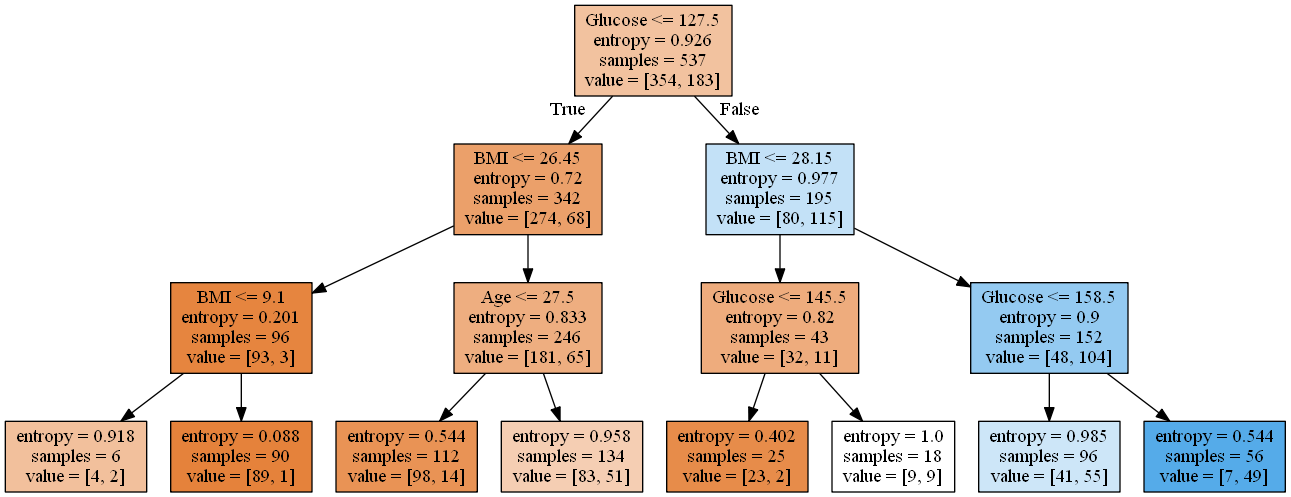

In [63]:
features = list(X.columns)
dot_data = StringIO()
export_graphviz(klf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

We have given depth =3

# Ensembles

Group of things known as ensembling. Coming to ML terms ensembling is nothing but multiple models used together.

Let {m1,m2,m3,............mn} are the base ML models. If we use them together we can obtain a powerful Machine Learning Model.

Four types of ensembling methods:

1. Bagging(Bootstrap Aggregation)
2. Boosting
3. Stacking
4. Cascading




# Random Forest (Bagging)

Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

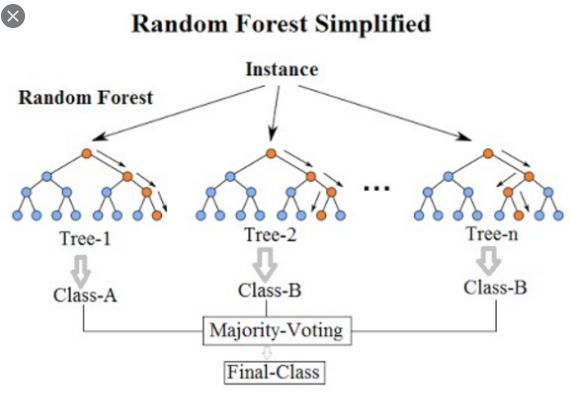

In [33]:
df = pd.read_csv('Employee.csv')
df.head()
# Traget label = Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [36]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [37]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [38]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0D76DC08>,
      dtype=object)

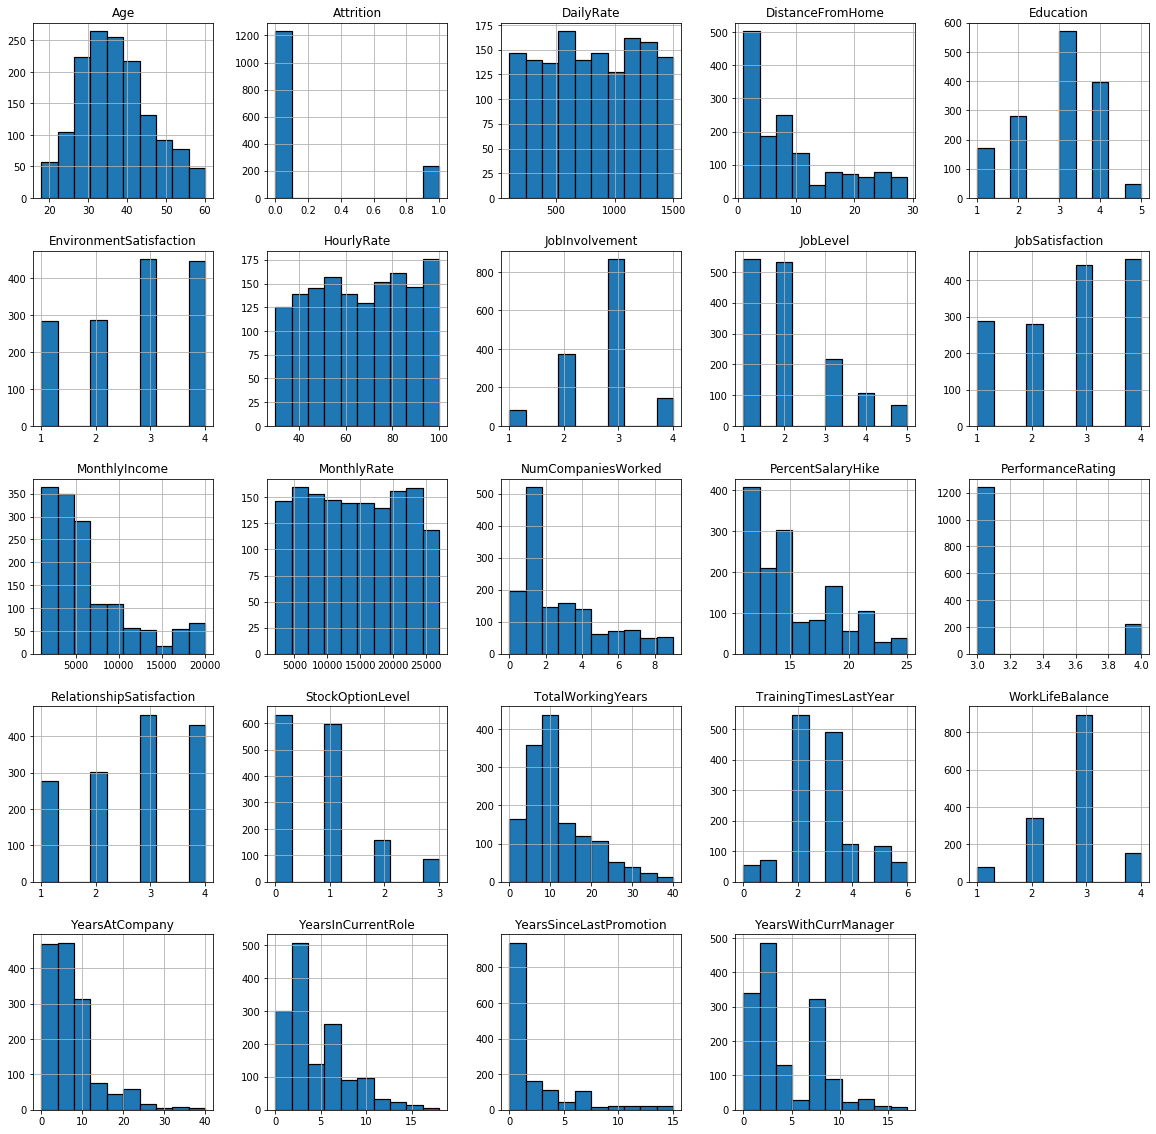

In [39]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [40]:
categorical_col.remove('Attrition')
from sklearn.preprocessing import LabelEncoder # used to transfrom non numeric labels to numeric labels

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [42]:

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100) #Read documentation for better understanding
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8639455782312925


# Boosting( AdaBoost)

https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
clf.predict([[0, 0, 0, 0]])
clf.score(X, y)

0.983